In [73]:
# From https://mathoverflow.net/questions/19404/approximation-of-a-normal-distribution-function
# Last answer.
var('phix')

# This is a "bad" approximation - but it might be enough for us.
eq = phix == 1/(1+exp(x))
sol = solve(eq, x)
sol

[x == log(1/phix - 1)]

In [74]:
# We need the inverse of this to get the desired shape.
rhs = sol[0].rhs()
rhs

log(1/phix - 1)

(4.54747350886464e-13)*(x - 0.5)^10 + 113.7777777777778*(x - 0.5)^9 + 36.57142857142858*(x - 0.5)^7 + 12.8*(x - 0.5)^5 + 5.333333333333334*(x - 0.5)^3 + 4.0*x - 2.0


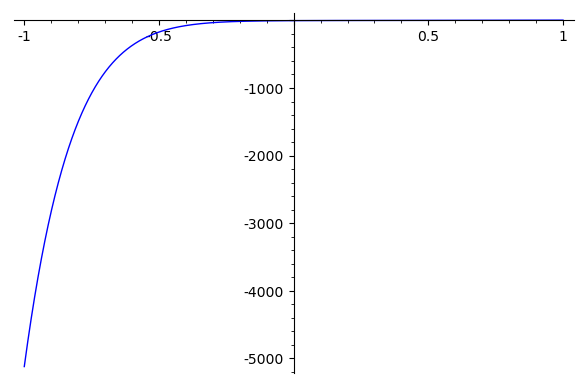

In [98]:
# Taylor expansion might be usefull for faster computation.

# NOTE: Only half of the Taylor series is nice -> we should probably mirror the nice half
deg = 10
cent = 0.5
tay = -taylor(rhs.subs(phix==x), x, cent, deg)
print(tay)
plot(tay)

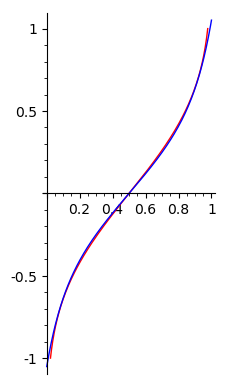

In [99]:
# Comparison with the "real" normal CDF.
T = RealDistribution('gaussian', 0.5)
p1 = parametric_plot((T.cum_distribution_function, x), (x, -1, 1), color="red")
# parametric_plot is used to plot the inverse.
p2 = plot(tay/3.4, xmin=0)
p1+p2